# 2 Problem Statement 
| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 509.8        |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  


In [37]:
def load_house_data():
    data = np.loadtxt("/media/indraneel/YO/Programming/ML/datafiles/houses.txt", delimiter=',', skiprows=1)
    # print(data)
    X = data[:,:4]
    y = data[:,4]

    return X, y

In [38]:
# Train a model 
import numpy as np 
import matplotlib.pyplot as plt
X_train,y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']
n = X_train.shape[0]
m = X_train.shape[1]
print(m,n)

4 99


Figure(1200x300) [<Axes: > <Axes: > <Axes: > <Axes: >]


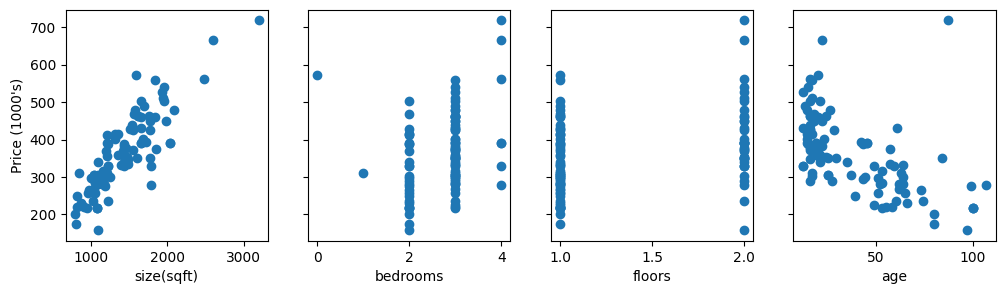

In [39]:
fig,ax=plt.subplots(1, 4,figsize=(12,3),sharey=True)
print(fig,ax)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

In [40]:
from MultipleLinearRegression import * 
w_init = np.zeros(m)
b_init = 0. 
print(f"Iteration     Cost          w0       w1       w2       w3       b       djdw0    djdw1     djdw2   djdw3    djdb  ")
print(f"---------|------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|")
w_fin,b_fin,hist = gradient_descent(X_train,y_train,w_init,b_init,1e-7,10)

Iteration     Cost          w0       w1       w2       w3       b       djdw0    djdw1     djdw2   djdw3    djdb  
---------|------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.42313e+04  5.5e-02  1.0e-04  5.2e-05  1.2e-03  3.6e-05 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 2.76461e+04  9.8e-02  1.8e-04  9.2e-05  2.2e-03  6.5e-05 -4.3e+05 -7.9e+02 -4.0e+02 -9.5e+03 -2.8e+02
        2 1.75102e+04  1.3e-01  2.4e-04  1.2e-04  2.9e-03  8.7e-05 -3.4e+05 -6.1e+02 -3.1e+02 -7.3e+03 -2.2e+02
        3 1.13157e+04  1.6e-01  2.9e-04  1.5e-04  3.5e-03  1.0e-04 -2.6e+05 -4.8e+02 -2.4e+02 -5.6e+03 -1.8e+02
        4 7.53002e+03  1.8e-01  3.3e-04  1.7e-04  3.9e-03  1.2e-04 -2.1e+05 -3.7e+02 -1.9e+02 -4.2e+03 -1.4e+02
        5 5.21639e+03  2.0e-01  3.5e-04  1.8e-04  4.2e-03  1.3e-04 -1.6e+05 -2.9e+02 -1.5e+02 -3.1e+03 -1.1e+02
        6 3.80242e+03  2.1e-01  3.8e-04  1.9e-04  4.5e-03  1.4e-04 -1.3e+05 -2.2e+02 -1.1e+02 -2.3e

### Feature Scaling Using Z score Normalisation:
The lectures discussed three different techniques: 
- Feature scaling, essentially dividing each positive feature by its maximum value, or more generally, rescale each feature by both its minimum and maximum values using (x-min)/(max-min). Both ways normalizes features to the range of -1 and 1, where the former method works for positive features which is simple and serves well for the lecture's example, and the latter method works for any features.
- Mean normalization: $x_i := \dfrac{x_i - \mu_i}{max - min} $ 
- Z-score normalization which we will explore below. 

### z-score normalization 
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$

>**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bed-
rooms), we must first normalize x using the mean and standard deviation
that we had previously computed from the training set.


In [59]:
def compute_Z_Normal(X):
    #axis-0 is for calculating mean along col
    #Computes mean
    mean = np.mean(X,axis=0)
    #computes standard Deviation 
    sigma =np.std(X,axis=0)
    #computes the Z-score normalisation
    X_norm = (X - mean) / sigma
    return X_norm,mean,sigma


In [67]:
X_norm,X_mu,X_sigma = compute_Z_Normal(X_train)
print(f"Norm : {X_norm[:5]}\n mean : {X_mu} \n stde : {X_sigma}")

Norm : [[-0.42363245  0.43380884 -0.78927234  0.99372644]
 [ 1.2842716   0.43380884  1.2669898  -0.82954214]
 [ 0.74493348  0.43380884  1.2669898   0.14028157]
 [ 1.31342501  0.43380884  1.2669898  -0.90712804]
 [-0.25357088 -1.10001528 -0.78927234 -0.94592099]]
 mean : [1.41837374e+03 2.71717172e+00 1.38383838e+00 3.83838384e+01] 
 stde : [411.61562893   0.65196523   0.48631932  25.77788069]


In [68]:
#now compute gradient descent with Normalised values 
print(f"Iteration     Cost          w0       w1       w2       w3       b       djdw0    djdw1     djdw2   djdw3    djdb  ")
print(f"---------|------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|")
w_norm,b_norm,hist = gradient_descent(X_norm,y_train,w_init,b_init,1.0e-1,1000)
print(f"The weights would be : {w_norm} and the bias would be : {b_norm}")

Iteration     Cost          w0       w1       w2       w3       b       djdw0    djdw1     djdw2   djdw3    djdb  
---------|------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 5.76170e+04  8.9e+00  3.0e+00  3.3e+00 -6.0e+00  3.6e+01 -8.9e+01 -3.0e+01 -3.3e+01  6.0e+01 -3.6e+02
      100 2.21086e+02  1.1e+02 -2.0e+01 -3.1e+01 -3.8e+01  3.6e+02 -9.2e-01  4.5e-01  5.3e-01 -1.7e-01 -9.6e-03
      200 2.19209e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.0e-02  1.5e-02  1.7e-02 -6.0e-03 -2.6e-07
      300 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.0e-03  5.1e-04  5.7e-04 -2.0e-04 -6.9e-12
      400 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.4e-05  1.7e-05  1.9e-05 -6.6e-06 -2.7e-13
      500 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.1e-06  5.6e-07  6.2e-07 -2.2e-07 -2.7e-13
      600 2.19207e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.7e-08  1.9e-08  2.1e-08 -7.3e

[300.    509.8   394.    540.    415.    230.    560.    294.    718.2
 200.    302.    468.    374.2   388.    282.    311.8   401.    449.8
 301.    502.    340.    400.282 572.    264.    304.    298.    219.8
 490.7   216.96  368.2   280.    526.87  237.    562.426 369.8   460.
 374.    390.    158.    426.    390.    277.774 216.96  425.8   504.
 329.    464.    220.    358.    478.    334.    426.98  290.    463.
 390.8   354.    350.    460.    237.    288.304 282.    249.    304.
 332.    351.8   310.    216.96  666.336 330.    480.    330.3   348.
 304.    384.    316.    430.4   450.    284.    275.    414.    258.
 378.    350.    412.    373.    225.    390.    267.4   464.    174.
 340.    430.    440.    216.    329.    388.    390.    356.    257.8  ]
[295.17615301 485.97796332 389.52416548 492.14712499 420.24701825
 222.78186731 523.41778348 267.55358319 685.19521613 181.74654413
 317.95303449 479.62518008 409.94682656 393.52554343 286.96885969
 323.28006627 405.9608337

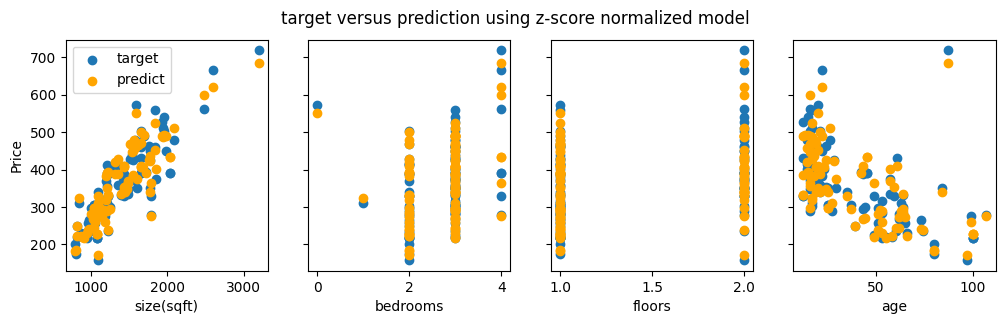

In [69]:
n = X_norm.shape[0]
yp = np.zeros(n)

for i in range(n):
    yp[i] = np.dot(X_norm[i],w_norm) + b_norm

print(y_train,yp,sep="\n")
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp,color=["orange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [70]:
# First, normalize out example.
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house - X_mu) / X_sigma
# x_house_norm,mu,sig = compute_Z_Normal(X_norm)
print(x_house_norm)
y_result = np.dot(x_house_norm,w_norm) + b_norm
print(f"{y_result * 1000:0.0f}")

[-0.53052829  0.43380884 -0.78927234  0.06269567]
318709


In [71]:
w_norm,b_norm

(array([110.56039756, -21.26715096, -32.70718139, -37.97015909]),
 363.15608080808056)